 <h2> Loading the necessary libraries <h2> 

In [1]:
import pandas as py# type: ignore
import matplotlib.pyplot as plt # type: ignore
import pandas as pd# type: ignore
from sklearn.model_selection import train_test_split# type: ignore
from sklearn.linear_model import LinearRegression# type: ignore
from sklearn.metrics import mean_squared_error# type: ignore
from sklearn.model_selection import train_test_split# type: ignore
import statsmodels.api as sm# type: ignore
import numpy as np



<h3> Load the dataset <h3>

In [2]:
df = pd.read_csv('amazon_2023_2024.csv')

<h3> Decreasing the variance on the dataset with moving averages <h3>

In [3]:

df['SMA_7'] = df['Close'].rolling(window=7).mean()
df['SMA_7_volume'] = df['Volume'].rolling(window=16).mean()
df['SMA_7_open'] = df['Open'].rolling(window=7).mean()
df['SMA_7_low'] = df['Low'].rolling(window=7).mean()
df['SMA_7_high'] = df['High'].rolling(window=7).mean()

<h3> Plotting the dataset <h3>

Text(0, 0.5, 'high')

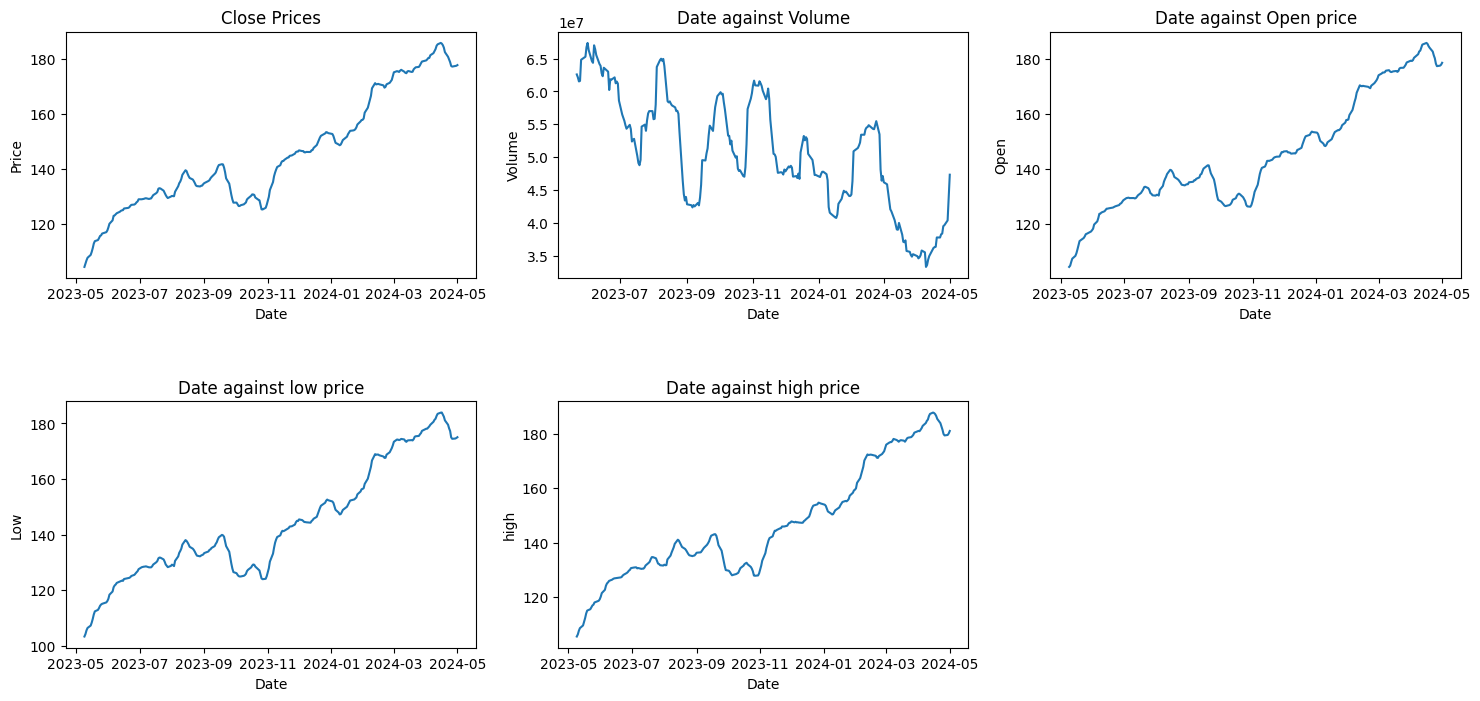

In [4]:
df['Date'] = py.to_datetime(df['Date'])
df.set_index(['Date'],inplace=True)

# Initialize one large figure to hold all subplots
plt.figure(figsize=(18, 8))  # Adjust overall figure size
plt.subplots_adjust(hspace=0.5) 



plt.subplot(2, 3, 1)  # 2 rows, 3 columns, position 1
plt.plot(df.index, df['SMA_7'])
plt.title('Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')



plt.subplot(2, 3, 2)  # 2 rows, 3 columns, position 1
plt.plot(df.index, df['SMA_7_volume'])
plt.title('Date against Volume')
plt.xlabel('Date')
plt.ylabel('Volume')




plt.subplot(2, 3, 3)  # 2 rows, 3 columns, position 1
plt.plot(df.index, df['SMA_7_open'])
plt.title('Date against Open price')
plt.xlabel('Date')
plt.ylabel('Open')



plt.subplot(2, 3, 4)  # 2 rows, 3 columns, position 1
plt.plot(df.index, df['SMA_7_low'])
plt.title('Date against low price')
plt.xlabel('Date')
plt.ylabel('Low')




plt.subplot(2, 3, 5)  # 2 rows, 3 columns, position 1
plt.plot(df.index, df['SMA_7_high'])
plt.title('Date against high price')
plt.xlabel('Date')
plt.ylabel('high')




In [5]:
split_percentage = 0.70

# Calculate the split index
split_index = int(len(df) * split_percentage)
# Split the DataFrame
df_train = df.iloc[:split_index]

<h3> ACF AND PACF PLOT <h3>

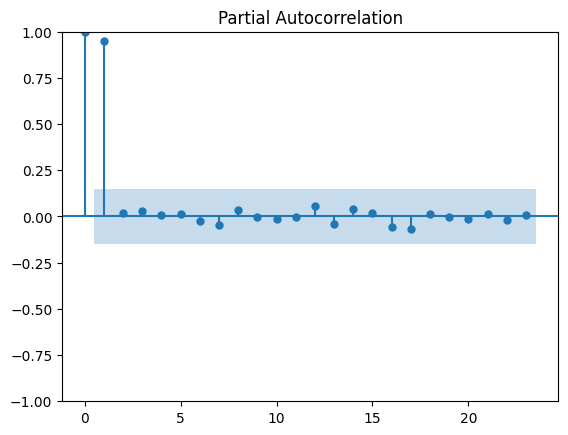

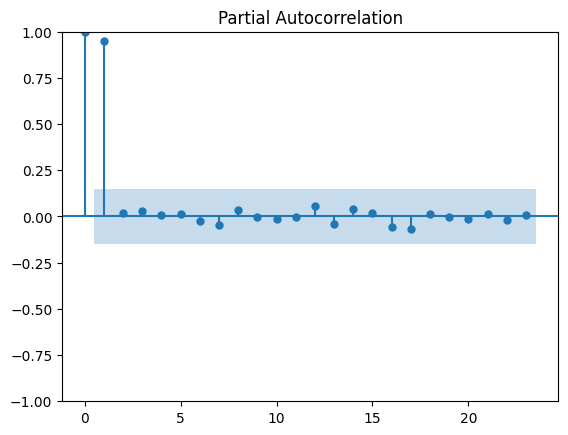

In [9]:
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf
df_train.index = py.to_datetime(df_train.index)
df_closing_train = py.DataFrame(df['Close'],df_train.index)
plot_pacf(df_closing_train)
